## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Datasets

In [2]:
#loading the datasets

flight = pd.read_csv("/content/drive/MyDrive/Data-Mining/flights.csv")
flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


In [3]:
plane_data = pd.read_csv("/content/drive/MyDrive/Data-Mining/plane-data.csv")
plane_data.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
flight_routes = pd.read_csv("/content/drive/MyDrive/Data-Mining/us_flight_routes.csv", encoding ="utf-16",delimiter='\t')
flight_routes.tail()

,Airport ID,Destination Airport,Destination City,Destination Country,Destination Name,Distance,Origin Airport,Origin City,Origin Country,Origin Name,...,Destination Latitude,Destination Longitude,Destination Point,Distance (Miles),Makeline,Number of Airlines,Origin Airport ID,Origin Latitude,Origin Longitude,Origin Point
4959,3469,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,False,SFO,San Francisco,United States,San Francisco International Airport,...,33.6367,-84.428101,Point,2138.896563,LineString,11,3469,37.618999,-122.375000,Point
4960,3682,MIA,Miami,United States,Miami International Airport,True,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,...,25.7932,-80.290604,Point,594.601524,LineString,12,3682,33.636700,-84.428101,Point
4961,3576,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,True,MIA,Miami,United States,Miami International Airport,...,33.6367,-84.428101,Point,594.601524,LineString,12,3576,25.793200,-80.290604,Point
4962,3682,ORD,Chicago,United States,Chicago O'Hare International Airport,True,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,...,41.9786,-87.904800,Point,605.810275,LineString,19,3682,33.636700,-84.428101,Point
4963,3830,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,True,ORD,Chicago,United States,Chicago O'Hare International Airport,...,33.6367,-84.428101,Point,605.810275,LineString,20,3830,41.978600,-87.904800,Point


## Checking number of Categorical and Numerical Attributes

In [5]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [6]:
plane_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tailnum        5029 non-null   object 
 1   type           4480 non-null   object 
 2   manufacturer   4480 non-null   object 
 3   issue_date     4479 non-null   object 
 4   model          4480 non-null   object 
 5   status         4480 non-null   object 
 6   aircraft_type  4480 non-null   object 
 7   engine_type    4477 non-null   object 
 8   year           4335 non-null   float64
dtypes: float64(1), object(8)
memory usage: 353.7+ KB


In [7]:
flight_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4964 entries, 0 to 4963
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airport ID              4964 non-null   int64  
 1   Destination Airport     4964 non-null   object 
 2   Destination City        4964 non-null   object 
 3   Destination Country     4964 non-null   object 
 4   Destination Name        4964 non-null   object 
 5   Distance                4964 non-null   bool   
 6   Origin Airport          4964 non-null   object 
 7   Origin City             4964 non-null   object 
 8   Origin Country          4964 non-null   object 
 9   Origin Name             4964 non-null   object 
 10  Buffer                  4964 non-null   object 
 11  Destination Airport ID  4964 non-null   int64  
 12  Destination Latitude    4964 non-null   float64
 13  Destination Longitude   4964 non-null   float64
 14  Destination Point       4964 non-null   

## Checking number of missing values in each dataframe

In [8]:
flight.isna().sum()

,0
year,0
month,0
day,0
dep_time,8255
sched_dep_time,0
dep_delay,8255
arr_time,8713
sched_arr_time,0
arr_delay,9430
carrier,0


In [9]:
plane_data.isna().sum()

,0
tailnum,0
type,549
manufacturer,549
issue_date,550
model,549
status,549
aircraft_type,549
engine_type,552
year,694


In [10]:
flight_routes.isna().sum()

,0
Airport ID,0
Destination Airport,0
Destination City,0
Destination Country,0
Destination Name,0
Distance,0
Origin Airport,0
Origin City,0
Origin Country,0
Origin Name,0


## Checking number of rows in each table.

In [11]:
len(flight)


336776

In [12]:
len(plane_data)

5029

In [13]:
len(flight_routes)

4964

## Replacing missing values, and carrying out Data Transformation

Replacing the missing values `dep_time` and `arr_time` with `sched_dep_time` and `sched_arr_time` as we are assuming that if there was no actual departure and arrival time, then the plane departed and arrived as per schedule.

In [14]:
# Replace missing values in dep_time with sched_dep_time
flight.loc[flight['dep_time'].isna(), 'dep_time'] = flight['sched_dep_time']

# Replace missing values in arr_time with sched_arr_time
flight.loc[flight['arr_time'].isna(), 'arr_time'] = flight['sched_arr_time']

flight.isna().sum()


,0
year,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,8255
arr_time,0
sched_arr_time,0
arr_delay,9430
carrier,0


Now that we have all the values in `dep_time` and `arr_time`, we can replace the missing values in `dep_delay` and `arr_delay` by subtracting the actual times with the schedule times.

In [15]:
import pandas as pd

# Function to convert HHMM format to total minutes
def convert_to_minutes(time_col):
    # Handle NaN cases for dep_time (since it's float64, it could have NaNs)
    time_col = time_col.fillna(0).astype(int)

    # Extract hours and minutes from HHMM format
    hours = time_col // 100
    minutes = time_col % 100

    # Convert the time into total minutes
    return hours * 60 + minutes

# Convert dep_time and sched_dep_time to minutes
flight['dep_time_minutes'] = convert_to_minutes(flight['dep_time'])
flight['sched_dep_time_minutes'] = convert_to_minutes(flight['sched_dep_time'])

# Replace missing dep_delay values by calculating dep_time - sched_dep_time
flight.loc[flight['dep_delay'].isna(), 'dep_delay'] = flight['dep_time_minutes'] - flight['sched_dep_time_minutes']

# Convert arr_time and sched_arr_time to minutes
flight['arr_time_minutes'] = convert_to_minutes(flight['arr_time'])
flight['sched_arr_time_minutes'] = convert_to_minutes(flight['sched_arr_time'])

# Replace missing arr_delay values by calculating arr_time - sched_arr_time
flight.loc[flight['arr_delay'].isna(), 'arr_delay'] = flight['arr_time_minutes'] - flight['sched_arr_time_minutes']

# Drop the intermediate time columns if no longer needed
flight = flight.drop(columns=['dep_time_minutes', 'sched_dep_time_minutes', 'arr_time_minutes', 'sched_arr_time_minutes'])

# Display the updated flight dataframe
flight.head()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


In [16]:
flight.isna().sum()

,0
year,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


Replacing the missing values in `air_time` as well by subtracting `arr_time` with `dep_time`

In [17]:
flight['arr_time_minutes'] = convert_to_minutes(flight['arr_time'])
flight['dep_time_minutes'] = convert_to_minutes(flight['dep_time'])

# Replace missing air_time values by calculating arr_time - dep_time
flight.loc[flight['air_time'].isna(), 'air_time'] = flight['arr_time_minutes'] - flight['dep_time_minutes']

# If you need to handle cases where the flight crosses midnight (e.g., dep_time is 2300 and arr_time is 0100):
flight.loc[flight['air_time'] < 0, 'air_time'] += 24 * 60  # Add 24 hours in minutes to fix negative values

# Drop the intermediate time columns if no longer needed
flight = flight.drop(columns=['arr_time_minutes', 'dep_time_minutes'])

# Display the updated flight dataframe
flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


In [18]:
flight.isna().sum()

,0
year,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


Removing the `time_hour` column as it is not required

In [19]:
# Remove the 'time_hour' column from the flight dataframe
flight = flight.drop(columns=['time_hour'])

# Display the updated flight dataframe
flight.head()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0


## Merging 2 datasets together.

merging `flight` and `plane_data` using left join on `tailnum` column to create a new `merged_data`.

In [20]:
# Perform left join on a common key, e.g., 'plane_id'
# Replace 'plane_id' with the actual column name common to both datasets
merged_data = pd.merge(flight, plane_data, how='left', on='tailnum')

# Display the first few rows of the merged dataset
merged_data.head()


,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year_y
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,5,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,5,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0


In [21]:
merged_data.isna().sum()

,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


In [22]:
len(merged_data)

336776

We will replace the missing values in the new columns of `merged_data` with "Not Available" because we cannot really replace these values with anything. We cannot make up these values. Hence its best suited to just replace them with saying that the data was not available.

"Not Available" - This will show that there are no missing values and you also don't have to loose any data points (in this case, any flights). When creating visualizations using these columns with "Not Available" values, we will just ignore the Not Available values.

In [23]:
# List of columns where missing values should be replaced with 'Not Available'
columns_to_fill = ['tailnum', 'type', 'manufacturer', 'issue_date', 'model', 'status', 'aircraft_type', 'engine_type', 'year_y']

# Replace missing values in these columns with 'Not Available'
merged_data[columns_to_fill] = merged_data[columns_to_fill].fillna("Not Available")

# Display the updated plane_data dataframe
merged_data.isna().sum()

,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


In [24]:
flight_routes.columns

Index(['Airport ID', 'Destination Airport', 'Destination City',
       'Destination Country', 'Destination Name', 'Distance', 'Origin Airport',
       'Origin City', 'Origin Country', 'Origin Name', 'Buffer',
       'Destination Airport ID', 'Destination Latitude',
       'Destination Longitude', 'Destination Point ', 'Distance (Miles)',
       'Makeline', 'Number of Airlines', 'Origin Airport ID',
       'Origin Latitude', 'Origin Longitude', 'Origin Point'],
      dtype='object')

In [25]:
merged_data.columns

Index(['year_x', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year_y'],
      dtype='object')

## Merging the 3rd Dataset.

Combining `merged_data` and `flight_routes` on `origin` and `dest`. This will give us information of Origina airport, Destination airports, Origin City, Destination City and other Route Information.

In [26]:
# Merge the two datasets on origin and destination airport codes
combined_data = pd.merge(merged_data, flight_routes,
                         how='left',
                         left_on=['origin', 'dest'],
                         right_on=['Origin Airport', 'Destination Airport'])

# Display the first few rows of the combined dataset
combined_data.head()


,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,Destination Latitude,Destination Longitude,Destination Point,Distance (Miles),Makeline,Number of Airlines,Origin Airport ID,Origin Latitude,Origin Longitude,Origin Point
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,29.9844,-95.341400,Point,1399.812458,LineString,1.0,3494.0,40.692501,-74.168701,Point
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,29.9844,-95.341400,Point,1416.367401,LineString,2.0,3697.0,40.777199,-73.872597,Point
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,25.7932,-80.290604,Point,1089.635644,LineString,3.0,3797.0,40.639801,-73.778900,Point
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,33.6367,-84.428101,Point,761.521651,LineString,7.0,3697.0,40.777199,-73.872597,Point


In [27]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Now, when you display the DataFrame, it will show all columns
combined_data.head(10)

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year_y,Airport ID,Destination Airport,Destination City,Destination Country,Destination Name,Distance,Origin Airport,Origin City,Origin Country,Origin Name,Buffer,Destination Airport ID,Destination Latitude,Destination Longitude,Destination Point,Distance (Miles),Makeline,Number of Airlines,Origin Airport ID,Origin Latitude,Origin Longitude,Origin Point
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,3494.0,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,EWR,Newark,United States,Newark Liberty International Airport,Polygon,3550.0,29.984400,-95.341400,Point,1399.812458,LineString,1.0,3494.0,40.692501,-74.168701,Point
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0,3697.0,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,LGA,New York,United States,La Guardia Airport,Polygon,3550.0,29.984400,-95.341400,Point,1416.367401,LineString,2.0,3697.0,40.777199,-73.872597,Point
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0,3797.0,MIA,Miami,United States,Miami International Airport,False,JFK,New York,United States,John F Kennedy International Airport,Polygon,3576.0,25.793200,-80.290604,Point,1089.635644,LineString,3.0,3797.0,40.639801,-73.778900,Point
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0,3697.0,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,True,LGA,New York,United States,La Guardia Airport,Polygon,3682.0,33.636700,-84.428101,Point,761.521651,LineString,7.0,3697.0,40.777199,-73.872597,Point
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,3494.0,ORD,Chicago,United States,Chicago O'Hare International Airport,True,EWR,Newark,United States,Newark Liberty International Airport,Polygon,3830.0,41.978600,-87.904800,Point,719.156918,LineString,3.0,3494.0,40.692501,-74.168701,Point
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,Foreign Corporation,AIRBUS INDUSTRIE,10/05/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2000.0,3494.0,FLL,Fort Lauderdale,United States,Fort Lauderdale Hollywood International Airport,False,EWR,Newark,United States,Newark Liberty International Airport,Polygon,3533.0,26.072599,-80.152702,Point,1064.607704,LineString,2.0,3494.0,40.692501,-74.168701,Point
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,Corporation,CANADAIR,04/23/2004,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0,3697.0,IAD,Washington,United States,Washington Dulles International Airport,True,LGA,New York,United States,La Guardia Airport,Polygon,3714.0,38.944500,-77.455803,Point,228.624105,LineString,1.0,3697.0,40.777199,-73.872597,Point
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,Corporation,AIRBUS,09/29/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004.0,3797.0,MCO,Orlando,United States,Orlando International Airport,True,JFK,New York,

In [28]:
combined_data.columns

Index(['year_x', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year_y', 'Airport ID',
       'Destination Airport', 'Destination City', 'Destination Country',
       'Destination Name', 'Distance', 'Origin Airport', 'Origin City',
       'Origin Country', 'Origin Name', 'Buffer', 'Destination Airport ID',
       'Destination Latitude', 'Destination Longitude', 'Destination Point ',
       'Distance (Miles)', 'Makeline', 'Number of Airlines',
       'Origin Airport ID', 'Origin Latitude', 'Origin Longitude',
       'Origin Point'],
      dtype='object')

Removing unncessary columns that won't be required for analysis.

In [29]:
# Remove the 'time_hour' column from the flight dataframe
combined_data = combined_data.drop(columns=['Buffer','Makeline','Origin Latitude','Origin Longitude','Origin Point','Destination Airport ID',
                                            'Destination Latitude', 'Destination Longitude','Destination Point ','Origin Point',
                                            'Origin Point','Distance (Miles)','Origin Airport ID','Airport ID'])

# Display the updated flight dataframe
combined_data.head(55)


,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year_y,Destination Airport,Destination City,Destination Country,Destination Name,Distance,Origin Airport,Origin City,Origin Country,Origin Name,Number of Airlines
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,EWR,Newark,United States,Newark Liberty International Airport,1.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,LGA,New York,United States,La Guardia Airport,2.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0,MIA,Miami,United States,Miami International Airport,False,JFK,New York,United States,John F Kennedy International Airport,3.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,True,LGA,New York,United States,La Guardia Airport,7.0
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,ORD,Chicago,United States,Chicago O'Hare International Airport,True,EWR,Newark,United States,Newark Liberty International Airport,3.0
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,Foreign Corporation,AIRBUS INDUSTRIE,10/05/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2000.0,FLL,Fort Lauderdale,United States,Fort Lauderdale Hollywood International Airport,False,EWR,Newark,United States,Newark Liberty International Airport,2.0
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,Corporation,CANADAIR,04/23/2004,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0,IAD,Washington,United States,Washington Dulles International Airport,True,LGA,New York,United States,La Guardia Airport,1.0
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,Corporation,AIRBUS,09/29/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004.0,MCO,Orlando,United States,Orlando International Airport,True,JFK,New York,United States,John F Kennedy International Airport,4.0
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,ORD,Chicago,United States,Chicago O'Hare International Airport,True,LGA,New York,United States,La Guardia Airport,5.0


In [30]:
combined_data.isna().sum()

,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


Let's find out the what are the destination airports that are having missing values for the particular `dest` in our flights.

In [31]:
# Filter rows where 'Destination City' has missing values (NaN)
missing_destination_city = combined_data[combined_data['Destination City'].isna()]

# Get the value counts of 'dest' for those rows
dest_value_counts = missing_destination_city['dest'].value_counts()

dest_value_counts

,count
dest,
SJU,5819
BQN,896
HNL,707
STT,522
BDL,443
PSE,365
MCI,276
AVL,275
IAH,274


Doing the same for Origin as well.

In [32]:
# Filter rows where 'Destination City' has missing values (NaN)
missing_origin_city = combined_data[combined_data['Origin City'].isna()]

# Get the value counts of 'dest' for those rows
missing_origin_counts = missing_destination_city['origin'].value_counts()

missing_origin_counts

,count
origin,
JFK,7736
EWR,2966
LGA,246


To manually replace the missing values in the `Destination City` and `Destination Country` column based on the `dest` codes and their corresponding cities, we can create a mapping between dest and Destination City, and then apply this mapping to fill the missing values.





In [33]:
# Create a mapping dictionary for 'dest' to 'Destination City'
city_mapping = {
    'SJU': 'Carolina',
    'BQN': 'Aguadilla',
    'HNL': 'Honolulu',
    'STT': 'St. Thomas',
    'BDL': 'Windsor Locks',
    'PSE': 'Ponce',
    'MCI': 'Missouri',
    'AVL': 'Fletcher',
    'IAH': 'Houston',
    'ACK': 'Nantucket',
    'MVY': 'West Tisbury',
    'EGE': 'Eagle County',
    'MKE': 'Milwaukee',
    'CRW': 'Charleston',
    'CAE': 'West Columbia',
    'TVC': 'Traverse City',
    'BZN': 'Bozeman',
    'JAC': 'Jackson',
    'PSP': 'Palm Springs',
    'HDN': 'Hayden',
    'MTJ': 'Montrose',
    'BWI': 'Baltimore',
    'SBN': 'South Bend',
    'ANC': 'Anchorage',
    'MEM': 'Memphis',
    'BHM': 'Birmingham',
    'LGA': 'LaGuardia'
}

# Create a mapping dictionary for 'dest' to 'Destination Country'
country_mapping = {
    'SJU': 'Puerto Rico',
    'BQN': 'Puerto Rico',
    'HNL': 'Hawaii',
    'STT': 'US Virgin Islands',
    'BDL': 'United States',
    'PSE': 'Puerto Rico',
    'MCI': 'United States',
    'AVL': 'United States',
    'IAH': 'United States',
    'ACK': 'United States',
    'MVY': 'United States',
    'EGE': 'United States',
    'MKE': 'United States',
    'CRW': 'United States',
    'CAE': 'United States',
    'TVC': 'United States',
    'BZN': 'United States',
    'JAC': 'United States',
    'PSP': 'United States',
    'HDN': 'United States',
    'MTJ': 'United States',
    'BWI': 'United States',
    'SBN': 'United States',
    'ANC': 'United States',
    'MEM': 'United States',
    'BHM': 'United States',
    'LGA': 'United States'
}

# Replace missing values in 'Destination City' using the city_mapping
combined_data['Destination City'] = combined_data['Destination City'].fillna(combined_data['dest'].map(city_mapping))

# Replace missing values in 'Destination Country' using the country_mapping
combined_data['Destination Country'] = combined_data['Destination Country'].fillna(combined_data['dest'].map(country_mapping))

# Display the updated combined_data dataframe
combined_data.isna().sum()


,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


Doing the same for Origin City and Origin Country with origin

In [34]:
# Create a mapping dictionary for 'origin' to 'Origin City'
origin_city_mapping = {
    'JFK': 'New York',
    'EWR': 'Newark',
    'LGA': 'LaGuardia'
}

# Create a mapping dictionary for 'origin' to 'Origin Country'
origin_country_mapping = {
    'JFK': 'United States',
    'EWR': 'United States',
    'LGA': 'United States'
}

# Replace missing values in 'Origin City' using the origin_city_mapping
combined_data['Origin City'] = combined_data['Origin City'].fillna(combined_data['origin'].map(origin_city_mapping))

# Replace missing values in 'Origin Country' using the origin_country_mapping
combined_data['Origin Country'] = combined_data['Origin Country'].fillna(combined_data['origin'].map(origin_country_mapping))

combined_data.isna().sum()


,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


Creating mappings for Desitnation Name and Origin Name as well.

In [35]:
# Create a mapping dictionary for 'dest' to 'Destination Name' (airport names)
destination_name_mapping = {
    'SJU': 'Luis Muñoz Marín International Airport',
    'BQN': 'Rafael Hernández Airport',
    'HNL': 'Daniel K. Inouye International Airport',
    'STT': 'Cyril E. King Airport',
    'BDL': 'Bradley International Airport',
    'PSE': 'Mercedita International Airport',
    'MCI': 'Kansas City International Airport',
    'AVL': 'Asheville Regional Airport',
    'IAH': 'George Bush Intercontinental Airport',
    'ACK': 'Nantucket Memorial Airport',
    'MVY': 'Martha\'s Vineyard Airport',
    'EGE': 'Eagle County Regional Airport',
    'MKE': 'General Mitchell International Airport',
    'CRW': 'Yeager Airport',
    'CAE': 'Columbia Metropolitan Airport',
    'TVC': 'Cherry Capital Airport',
    'BZN': 'Bozeman Yellowstone International Airport',
    'JAC': 'Jackson Hole Airport',
    'PSP': 'Palm Springs International Airport',
    'HDN': 'Yampa Valley Regional Airport',
    'MTJ': 'Montrose Regional Airport',
    'BWI': 'Baltimore/Washington International Thurgood Marshall Airport',
    'SBN': 'South Bend International Airport',
    'ANC': 'Ted Stevens Anchorage International Airport',
    'MEM': 'Memphis International Airport',
    'BHM': 'Birmingham-Shuttlesworth International Airport',
    'LGA': 'LaGuardia Airport'
}

# Create a mapping dictionary for 'origin' to 'Origin Name' (airport names)
origin_name_mapping = {
    'JFK': 'John F. Kennedy International Airport',
    'EWR': 'Newark Liberty International Airport',
    'LGA': 'LaGuardia Airport'
}

# Replace missing values in 'Destination Name' using the destination_name_mapping
combined_data['Destination Name'] = combined_data['Destination Name'].fillna(combined_data['dest'].map(destination_name_mapping))

# Replace missing values in 'Origin Name' using the origin_name_mapping
combined_data['Origin Name'] = combined_data['Origin Name'].fillna(combined_data['origin'].map(origin_name_mapping))

combined_data.isna().sum()

,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


In [36]:
# Replace missing values in 'Destination Airport' with the respective values from 'dest'
combined_data['Destination Airport'] = combined_data['Destination Airport'].fillna(combined_data['dest'])

# Replace missing values in 'Origin Airport' with the respective values from 'origin'
combined_data['Origin Airport'] = combined_data['Origin Airport'].fillna(combined_data['origin'])

combined_data.head(10)

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year_y,Destination Airport,Destination City,Destination Country,Destination Name,Distance,Origin Airport,Origin City,Origin Country,Origin Name,Number of Airlines
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,EWR,Newark,United States,Newark Liberty International Airport,1.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,LGA,New York,United States,La Guardia Airport,2.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0,MIA,Miami,United States,Miami International Airport,False,JFK,New York,United States,John F Kennedy International Airport,3.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,BQN,Aguadilla,Puerto Rico,Rafael Hernández Airport,NaN,JFK,New York,United States,John F. Kennedy International Airport,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,True,LGA,New York,United States,La Guardia Airport,7.0
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,ORD,Chicago,United States,Chicago O'Hare International Airport,True,EWR,Newark,United States,Newark Liberty International Airport,3.0
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,Foreign Corporation,AIRBUS INDUSTRIE,10/05/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2000.0,FLL,Fort Lauderdale,United States,Fort Lauderdale Hollywood International Airport,False,EWR,Newark,United States,Newark Liberty International Airport,2.0
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,Corporation,CANADAIR,04/23/2004,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0,IAD,Washington,United States,Washington Dulles International Airport,True,LGA,New York,United States,La Guardia Airport,1.0
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,Corporation,AIRBUS,09/29/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004.0,MCO,Orlando,United States,Orlando International Airport,True,JFK,New York,United States,John F Kennedy International Airport,4.0
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,ORD,Chicago,United States,Chicago O'Hare International Airport,True,LGA,New York,United States,La Guardia Airport,5.0


In [37]:
combined_data.isna().sum()

,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


To replace the missing values in the `Number of Airlines` column with the number of airlines that fly to each Destination Airport, we can follow these steps:

* Count the Number of Airlines per Destination Airport: This will involve grouping the data by `Destination Airport` and counting the number of unique airlines (`carrier`).
* Use this information to fill missing values in Number of Airlines.



In [38]:
# Step 1: Group by 'Destination Airport' and count the number of unique carriers (airlines)
airlines_per_destination = combined_data.groupby('Destination Airport')['carrier'].nunique()

# Step 2: Create a mapping of 'Destination Airport' to the number of airlines
airlines_mapping = airlines_per_destination.to_dict()

airlines_mapping

{'ABQ': 1,
 'ACK': 1,
 'ALB': 1,
 'ANC': 1,
 'ATL': 7,
 'AUS': 6,
 'AVL': 2,
 'BDL': 2,
 'BGR': 2,
 'BHM': 1,
 'BNA': 5,
 'BOS': 7,
 'BQN': 2,
 'BTV': 3,
 'BUF': 4,
 'BUR': 1,
 'BWI': 4,
 'BZN': 1,
 'CAE': 2,
 'CAK': 1,
 'CHO': 1,
 'CHS': 4,
 'CLE': 5,
 'CLT': 7,
 'CMH': 3,
 'CRW': 1,
 'CVG': 4,
 'DAY': 2,
 'DCA': 6,
 'DEN': 5,
 'DFW': 4,
 'DSM': 2,
 'DTW': 6,
 'EGE': 2,
 'EYW': 1,
 'FLL': 4,
 'GRR': 2,
 'GSO': 2,
 'GSP': 2,
 'HDN': 1,
 'HNL': 2,
 'HOU': 2,
 'IAD': 6,
 'IAH': 2,
 'ILM': 1,
 'IND': 5,
 'JAC': 2,
 'JAX': 4,
 'LAS': 5,
 'LAX': 5,
 'LEX': 1,
 'LGA': 1,
 'LGB': 1,
 'MCI': 3,
 'MCO': 4,
 'MDW': 1,
 'MEM': 3,
 'MHT': 2,
 'MIA': 3,
 'MKE': 4,
 'MSN': 2,
 'MSP': 6,
 'MSY': 6,
 'MTJ': 1,
 'MVY': 2,
 'MYR': 1,
 'OAK': 1,
 'OKC': 1,
 'OMA': 3,
 'ORD': 7,
 'ORF': 3,
 'PBI': 5,
 'PDX': 3,
 'PHL': 5,
 'PHX': 5,
 'PIT': 6,
 'PSE': 1,
 'PSP': 1,
 'PVD': 1,
 'PWM': 3,
 'RDU': 5,
 'RIC': 2,
 'ROC': 3,
 'RSW': 4,
 'SAN': 4,
 'SAT': 3,
 'SAV': 1,
 'SBN': 1,
 'SDF': 3,
 'SEA': 5,
 'SFO': 5,

In [39]:
combined_data['Number of Airlines'] = combined_data['Number of Airlines'].fillna(combined_data['Destination Airport'].map(airlines_mapping))

combined_data.isna().sum()

,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


In [40]:
combined_data.head(10)

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year_y,Destination Airport,Destination City,Destination Country,Destination Name,Distance,Origin Airport,Origin City,Origin Country,Origin Name,Number of Airlines
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,EWR,Newark,United States,Newark Liberty International Airport,1.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,LGA,New York,United States,La Guardia Airport,2.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0,MIA,Miami,United States,Miami International Airport,False,JFK,New York,United States,John F Kennedy International Airport,3.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,BQN,Aguadilla,Puerto Rico,Rafael Hernández Airport,NaN,JFK,New York,United States,John F. Kennedy International Airport,2.0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,True,LGA,New York,United States,La Guardia Airport,7.0
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,ORD,Chicago,United States,Chicago O'Hare International Airport,True,EWR,Newark,United States,Newark Liberty International Airport,3.0
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,Foreign Corporation,AIRBUS INDUSTRIE,10/05/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2000.0,FLL,Fort Lauderdale,United States,Fort Lauderdale Hollywood International Airport,False,EWR,Newark,United States,Newark Liberty International Airport,2.0
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,Corporation,CANADAIR,04/23/2004,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0,IAD,Washington,United States,Washington Dulles International Airport,True,LGA,New York,United States,La Guardia Airport,1.0
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,Corporation,AIRBUS,09/29/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004.0,MCO,Orlando,United States,Orlando International Airport,True,JFK,New York,United States,John F Kennedy International Airport,4.0
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,ORD,Chicago,United States,Chicago O'Hare International Airport,True,LGA,New York,United States,La Guardia Airport,5.0


Finally removing some few columns. Renaming certain columns for better clarity.

In [41]:
# Step 1: Remove the columns 'Distance', 'Destination Airport', and 'Origin Airport'
combined_data = combined_data.drop(columns=['Distance', 'Destination Airport', 'Origin Airport'])

# Step 2: Rename 'year_x' to 'Flight Year' and 'year_y' to 'Manufacturing Year'
combined_data = combined_data.rename(columns={'year_x': 'Flight Year', 'year_y': 'Manufacturing Year'})

Creating a boolean `Delayed` column with `Yes` or `No` values based on if `arr_delay` > 0, then the flight was delayed. This column is going to be our target column for future machine learning models.

In [42]:
# Create a boolean column 'Delayed'
combined_data['Delayed'] = np.where(combined_data['arr_delay'] > 0, 'Yes', 'No')

## Final Cleaned Data.
Finally, after cleaning, transformations, reductions, quality checks, merging, we have our `combined_data` as the final cleaned data that can now be used for further EDA and answering our questions.

In [43]:
combined_data.head(10)

,Flight Year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,Manufacturing Year,Destination City,Destination Country,Destination Name,Origin City,Origin Country,Origin Name,Number of Airlines,Delayed
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Houston,United States,George Bush Intercontinental Houston Airport,Newark,United States,Newark Liberty International Airport,1.0,Yes
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0,Houston,United States,George Bush Intercontinental Houston Airport,New York,United States,La Guardia Airport,2.0,Yes
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0,Miami,United States,Miami International Airport,New York,United States,John F Kennedy International Airport,3.0,Yes
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Aguadilla,Puerto Rico,Rafael Hernández Airport,New York,United States,John F. Kennedy International Airport,2.0,No
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,New York,United States,La Guardia Airport,7.0,No
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Chicago,United States,Chicago O'Hare International Airport,Newark,United States,Newark Liberty International Airport,3.0,Yes
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,Foreign Corporation,AIRBUS INDUSTRIE,10/05/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2000.0,Fort Lauderdale,United States,Fort Lauderdale Hollywood International Airport,Newark,United States,Newark Liberty International Airport,2.0,Yes
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,Corporation,CANADAIR,04/23/2004,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0,Washington,United States,Washington Dulles International Airport,New York,United States,La Guardia Airport,1.0,No
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,Corporation,AIRBUS,09/29/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004.0,Orlando,United States,Orlando International Airport,New York,United States,John F Kennedy International Airport,4.0,No
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Chicago,United States,Chicago O'Hare International Airport,New York,United States,La Guardia Airport,5.0,Yes


Finding Central Tendencies and Dispersions in our `combined_data`.
We are looking at these descriptive measures on columns such as `dep_delay`, `arr_delay`, `air_time`, and `distance`.

From the descriptive measures, we can see that on average the departure delays of flights is around 12 minutes and on average the arrival delay of flights is around 6 minutes.

We can also see that flights on average across the country have an air time of 150 minutes and travel an average distance of 1040 miles.

## Questions already answered in Milestone 2:

* Which Airline has the most delays?
* Average Delays under different categories.
* Which are the peak travel seasons in a year?
* How does airplane model influence performance?

## Answering our remaining questions:

* Which airports have most delayed arrival and departure - Is there a relation between how busy the airport is and between delays?

* Which airports experience the most passengers?

* Can we detect cascading delays - does an incoming flight delay cause a delay for an outbound flight?


### Which airports have most delayed arrival and departure?

In [44]:
data = combined_data

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total and average departure delay by origin airport
dep_delay_by_origin = (
    data[data['dep_delay'] > 0]
    .groupby('Origin Name')['dep_delay']
    .agg(['count', 'sum', 'mean'])
    .rename(columns={'count': 'Num_Delayed_Flights', 'sum': 'Total_Dep_Delay', 'mean': 'Avg_Dep_Delay'})
    .sort_values(by='Total_Dep_Delay', ascending=False)
)

# Calculate total and average arrival delay by destination airport
arr_delay_by_destination = (
    data[data['arr_delay'] > 0]
    .groupby('Destination Name')['arr_delay']
    .agg(['count', 'sum', 'mean'])
    .rename(columns={'count': 'Num_Delayed_Flights', 'sum': 'Total_Arr_Delay', 'mean': 'Avg_Arr_Delay'})
    .sort_values(by='Total_Arr_Delay', ascending=False)
)

# Selecting the top 10 airports with most delayed departures and arrivals
dep_delay_by_origin_top = dep_delay_by_origin.head(10)
arr_delay_by_destination_top = arr_delay_by_destination.head(10)

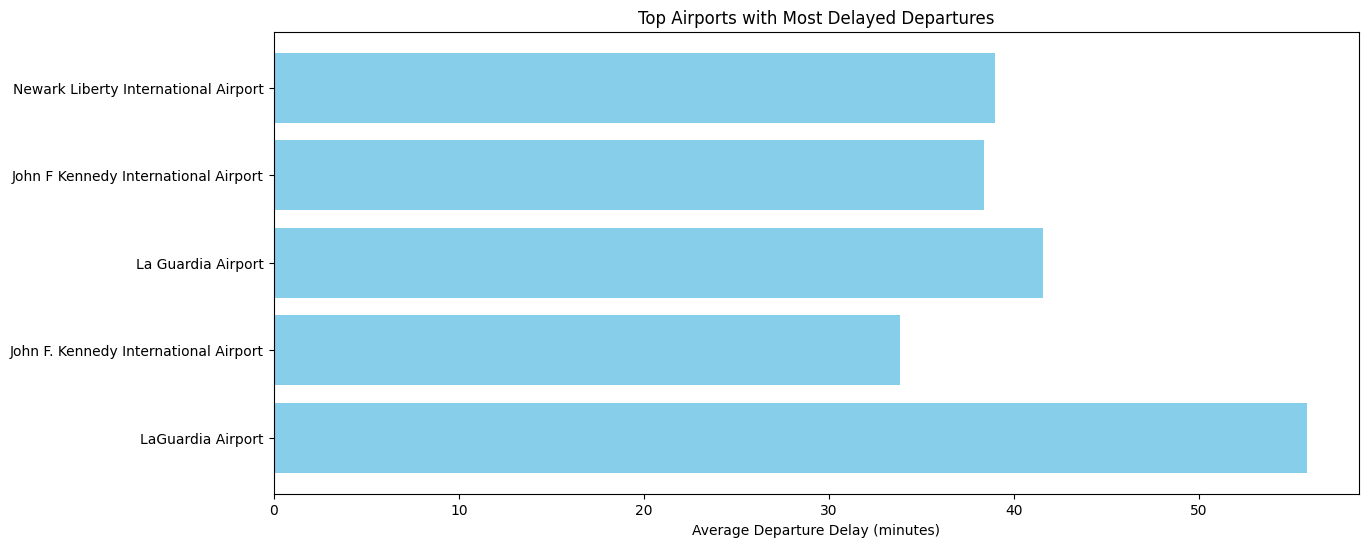

In [46]:
plt.figure(figsize=(14, 6))
plt.barh(dep_delay_by_origin_top.index, dep_delay_by_origin_top['Avg_Dep_Delay'], color='skyblue')
plt.xlabel("Average Departure Delay (minutes)")
plt.title("Top Airports with Most Delayed Departures")
plt.gca().invert_yaxis()
plt.show()

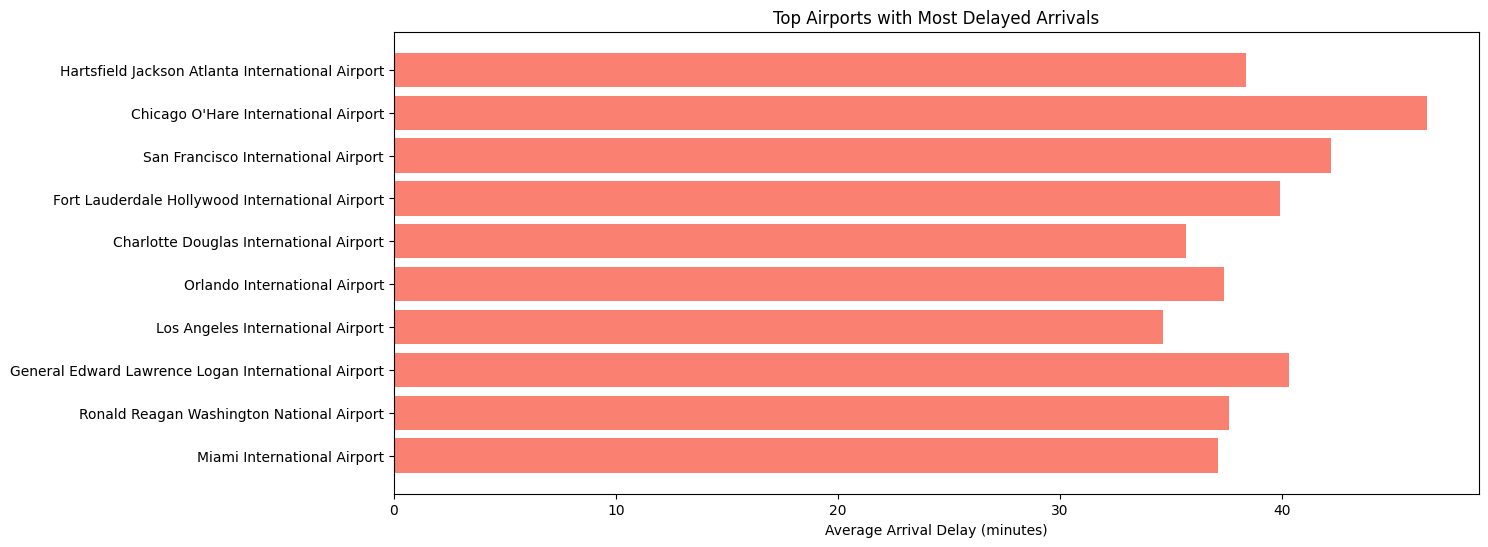

In [47]:
# Plotting the top 10 airports with the most delayed arrivals
plt.figure(figsize=(14, 6))
plt.barh(arr_delay_by_destination_top.index, arr_delay_by_destination_top['Avg_Arr_Delay'], color='salmon')
plt.xlabel("Average Arrival Delay (minutes)")
plt.title("Top Airports with Most Delayed Arrivals")
plt.gca().invert_yaxis()
plt.show()

### Which airports experience the most passengers?

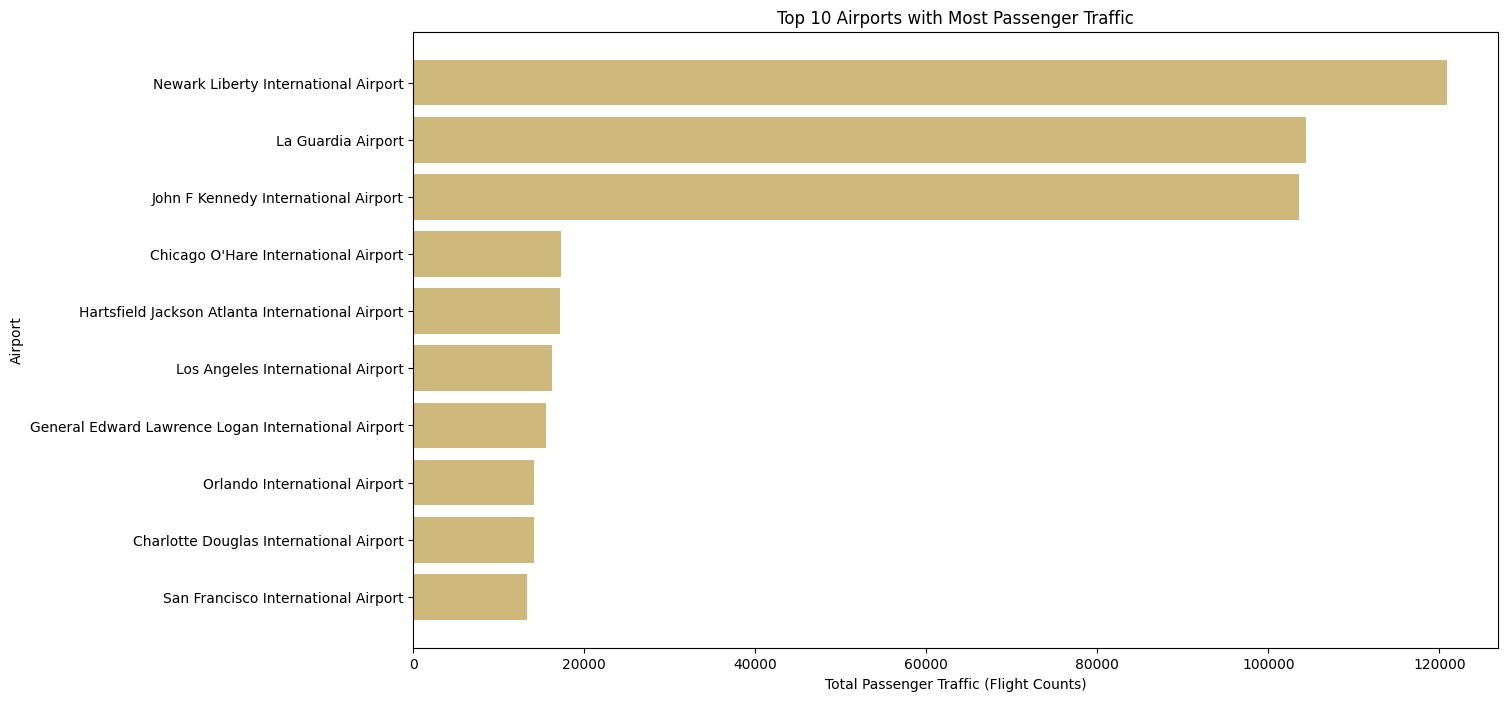

In [48]:
# Calculate passenger counts by counting flights for each airport (both origin and destination)
passenger_counts_origin = data['Origin Name'].value_counts()
passenger_counts_destination = data['Destination Name'].value_counts()

# Combine origin and destination counts to get total traffic per airport
total_passenger_counts = passenger_counts_origin.add(passenger_counts_destination, fill_value=0)
total_passenger_counts = total_passenger_counts.sort_values(ascending=False)

# Select the top 10 airports with the most passenger traffic
top_airports_by_passenger = total_passenger_counts.head(10)

# Plotting the top 10 airports with the most passengers
plt.figure(figsize=(14, 8))
plt.barh(top_airports_by_passenger.index, top_airports_by_passenger.values, color='#CFB87C')
plt.xlabel("Total Passenger Traffic (Flight Counts)")
plt.ylabel("Airport")
plt.title("Top 10 Airports with Most Passenger Traffic")
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

### Can we detect cascading delays - does an incoming flight delay cause a delay for an outbound flight?

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

data = combined_data

# Sort by tail number and arrival time to align arrivals with subsequent departures for the same plane
data = data.sort_values(by=['tailnum', 'arr_time'])

# Shift data to get the next flight's departure delay for the same tailnum
data['next_dep_delay'] = data.groupby('tailnum')['dep_delay'].shift(-1)
data['next_dep_airport'] = data.groupby('tailnum')['Origin Name'].shift(-1)
data['next_dep_time'] = data.groupby('tailnum')['dep_time'].shift(-1)

# Initial filter: Only keep rows where the next flight departs from the same airport and there was an arrival delay
cascading_delays_same_plane = data[(data['Destination Name'] == data['next_dep_airport']) &
                                   (data['arr_delay'] > 0) & (data['next_dep_delay'] > 0)]

# Step 1: Check if there are rows after initial filtering
print("Checking data after initial processing:")
print(data[['tailnum', 'arr_delay', 'Destination Name', 'next_dep_delay', 'next_dep_airport']].head(20))

# Step 2: Temporarily remove the `next_dep_delay > 0` condition to check for any matches without strict delay on departure
cascading_delays_same_plane_test = data[(data['Destination Name'] == data['next_dep_airport']) &
                                        (data['arr_delay'] > 0)].dropna(subset=['arr_delay', 'next_dep_delay'])

# Display if any rows match this relaxed condition
print("Filtered data without departure delay condition:")
print(cascading_delays_same_plane_test[['tailnum', 'arr_delay', 'next_dep_delay', 'Destination Name', 'next_dep_airport']].head(20))

# Step 3: If any rows are found, plot with loosened filter conditions
if not cascading_delays_same_plane_test.empty:
    plt.figure(figsize=(10, 6))
    plt.scatter(cascading_delays_same_plane_test['arr_delay'], cascading_delays_same_plane_test['next_dep_delay'],
                alpha=0.5, color='orange')
    plt.title("Cascading Delays: Arrival Delay vs. Next Departure Delay (Same Plane - Loosened Filter)")
    plt.xlabel("Arrival Delay (minutes)")
    plt.ylabel("Next Departure Delay (minutes)")
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.show()
else:
    print("No cascading delays found with the same plane.")

Checking data after initial processing:
       tailnum  arr_delay                                   Destination Name  \
157799  D942DN        2.0                      Orlando International Airport   
254418  D942DN      -11.0   Hartsfield Jackson Atlanta International Airport   
157233  D942DN       44.0                      Orlando International Airport   
120316  D942DN       91.0   Hartsfield Jackson Atlanta International Airport   
222185  N0EGMQ      100.0                    Nashville International Airport   
223757  N0EGMQ      223.0  Minneapolis-St Paul International/Wold-Chamber...   
152883  N0EGMQ      161.0   Hartsfield Jackson Atlanta International Airport   
261681  N0EGMQ      -20.0               Chicago O'Hare International Airport   
231416  N0EGMQ      -18.0               Chicago O'Hare International Airport   
128914  N0EGMQ      -15.0               Chicago O'Hare International Airport   
266431  N0EGMQ       17.0               Chicago O'Hare International Airport   


We cannot find any cascading delays based on this dataset.

## Modelling

Trying Logistic Regression.

Our target column is `Delayed` which is a binary column with values 0 and 1.

Before, we can proceed with the modelling, we have to carry out some transformations of our data to be able to fit it in our Logisitic Regression model.


### Look of Data before Transformation for Logistic Regression.

In [50]:
combined_data.head()

,Flight Year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,Manufacturing Year,Destination City,Destination Country,Destination Name,Origin City,Origin Country,Origin Name,Number of Airlines,Delayed
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Houston,United States,George Bush Intercontinental Houston Airport,Newark,United States,Newark Liberty International Airport,1.0,Yes
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0,Houston,United States,George Bush Intercontinental Houston Airport,New York,United States,La Guardia Airport,2.0,Yes
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0,Miami,United States,Miami International Airport,New York,United States,John F Kennedy International Airport,3.0,Yes
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Aguadilla,Puerto Rico,Rafael Hernández Airport,New York,United States,John F. Kennedy International Airport,2.0,No
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,New York,United States,La Guardia Airport,7.0,No


In [51]:
combined_data.columns

Index(['Flight Year', 'month', 'day', 'dep_time', 'sched_dep_time',
       'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier',
       'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour',
       'minute', 'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'Manufacturing Year',
       'Destination City', 'Destination Country', 'Destination Name',
       'Origin City', 'Origin Country', 'Origin Name', 'Number of Airlines',
       'Delayed'],
      dtype='object')

In [52]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Flight Year          336776 non-null  int64  
 1   month                336776 non-null  int64  
 2   day                  336776 non-null  int64  
 3   dep_time             336776 non-null  float64
 4   sched_dep_time       336776 non-null  int64  
 5   dep_delay            336776 non-null  float64
 6   arr_time             336776 non-null  float64
 7   sched_arr_time       336776 non-null  int64  
 8   arr_delay            336776 non-null  float64
 9   carrier              336776 non-null  object 
 10  flight               336776 non-null  int64  
 11  tailnum              336776 non-null  object 
 12  origin               336776 non-null  object 
 13  dest                 336776 non-null  object 
 14  air_time             336776 non-null  float64
 15  distance         

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

We first need to convert our `Delayed` column from `Yes` or `No` values to `1` and `0`.

In [54]:
def encode_target(df):
    """Convert 'Delayed' column to binary format"""
    data = df.copy()
    le = LabelEncoder()
    data['Delayed'] = le.fit_transform(data['Delayed'])
    return data

combined_data = encode_target(combined_data)

combined_data['Delayed'].head()

,Delayed
0,1
1,1
2,1
3,0
4,0


We'll create some additional time-based features to add some interesting predictors for our LR model.

Based on our `hour` column, we can classify if a flight is in the morning, afternoon, evening, or a night.

This can tell us later that if a morning or a night flight have a higher probability of getting delayed or not.

In [55]:
def create_temporal_features(df):
    """Create additional time-based features"""
    data = df.copy()

    # Weekend indicator (assuming 6,7 are weekend days)
    data['is_weekend'] = data['day'].isin([6, 7]).astype(int)

    # Holiday season indicator
    data['is_holiday_month'] = data['month'].isin([7, 8, 12, 1]).astype(int)

    # Time of day features
    data['is_morning'] = (data['hour'] >= 5) & (data['hour'] < 12).astype(int)
    data['is_afternoon'] = (data['hour'] >= 12) & (data['hour'] < 18).astype(int)
    data['is_evening'] = (data['hour'] >= 18) & (data['hour'] < 23).astype(int)
    data['is_night'] = ((data['hour'] >= 23) | (data['hour'] < 5)).astype(int)

    return data

combined_data = create_temporal_features(combined_data)
combined_data.head()

,Flight Year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,Manufacturing Year,Destination City,Destination Country,Destination Name,Origin City,Origin Country,Origin Name,Number of Airlines,Delayed,is_weekend,is_holiday_month,is_morning,is_afternoon,is_evening,is_night
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Houston,United States,George Bush Intercontinental Houston Airport,Newark,United States,Newark Liberty International Airport,1.0,1,0,1,True,False,False,0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0,Houston,United States,George Bush Intercontinental Houston Airport,New York,United States,La Guardia Airport,2.0,1,0,1,True,False,False,0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0,Miami,United States,Miami International Airport,New York,United States,John F Kennedy International Airport,3.0,1,0,1,True,False,False,0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Aguadilla,Puerto Rico,Rafael Hernández Airport,New York,United States,John F. Kennedy International Airport,2.0,0,0,1,True,False,False,0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,New York,United States,La Guardia Airport,7.0,0,0,1,True,False,False,0


In [56]:
def process_time_features(df):
    """Convert time columns to minutes since midnight"""
    data = df.copy()

    def time_to_minutes(time_val):
        if pd.isna(time_val):
            return np.nan
        time_str = str(int(time_val))
        time_str = '0' * (4 - len(time_str)) + time_str if len(time_str) < 4 else time_str
        hours = int(time_str[:-2])
        minutes = int(time_str[-2:])
        return hours * 60 + minutes

    # Convert time columns to minutes
    time_columns = ['dep_time', 'arr_time']
    for col in time_columns:
        data[f'{col}_minutes'] = data[col].apply(time_to_minutes)

    # Drop original time columns
    data = data.drop(columns=time_columns)

    return data

combined_data = process_time_features(combined_data)

In [57]:
combined_data.head()

,Flight Year,month,day,sched_dep_time,dep_delay,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,Manufacturing Year,Destination City,Destination Country,Destination Name,Origin City,Origin Country,Origin Name,Number of Airlines,Delayed,is_weekend,is_holiday_month,is_morning,is_afternoon,is_evening,is_night,dep_time_minutes,arr_time_minutes
0,2013,1,1,515,2.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Houston,United States,George Bush Intercontinental Houston Airport,Newark,United States,Newark Liberty International Airport,1.0,1,0,1,True,False,False,0,317,510
1,2013,1,1,529,4.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0,Houston,United States,George Bush Intercontinental Houston Airport,New York,United States,La Guardia Airport,2.0,1,0,1,True,False,False,0,333,530
2,2013,1,1,540,2.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0,Miami,United States,Miami International Airport,New York,United States,John F Kennedy International Airport,3.0,1,0,1,True,False,False,0,342,563
3,2013,1,1,545,-1.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Aguadilla,Puerto Rico,Rafael Hernández Airport,New York,United States,John F. Kennedy International Airport,2.0,0,0,1,True,False,False,0,344,604
4,2013,1,1,600,-6.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,New York,United States,La Guardia Airport,7.0,0,0,1,True,False,False,0,354,492


In [58]:
def encode_categorical_features(df):
    """One-hot encode categorical variables"""
    data = df.copy()

    # Location features to keep
    location_columns = [
        'Origin City', 'Origin Name', 'Destination City', 'Destination Name'
    ]

    # Other categorical features
    other_categorical = [
        'carrier', 'type', 'manufacturer', 'model',
        'status', 'aircraft_type', 'engine_type'
    ]

    # Encode location features
    for col in location_columns:
        # Get top 10 most frequent locations, group others as 'Other'
        top_locations = data[col].value_counts().nlargest(10).index
        data[col] = data[col].apply(lambda x: x if x in top_locations else 'Other')

    # Combine all categorical columns for one-hot encoding
    categorical_columns = location_columns + other_categorical
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

    return data

combined_data = encode_categorical_features(combined_data)
combined_data.head()

,Flight Year,month,day,sched_dep_time,dep_delay,sched_arr_time,arr_delay,flight,tailnum,origin,dest,air_time,distance,hour,minute,issue_date,Manufacturing Year,Destination Country,Origin Country,Number of Airlines,Delayed,is_weekend,is_holiday_month,is_morning,is_afternoon,is_evening,is_night,dep_time_minutes,arr_time_minutes,Origin City_New York,Origin City_Newark,Origin Name_John F. Kennedy International Airport,Origin Name_La Guardia Airport,Origin Name_LaGuardia Airport,Origin Name_Newark Liberty International Airport,Destination City_Boston,Destination City_Charlotte,Destination City_Chicago,Destination City_Fort Lauderdale,Destination City_Los Angeles,Destination City_Miami,Destination City_Orlando,Destination City_Other,Destination City_San Francisco,Destination City_Washington,Destination Name_Chicago O'Hare International Airport,Destination Name_Fort Lauderdale Hollywood International Airport,Destination Name_General Edward Lawrence Logan International Airport,Destination Name_Hartsfield Jackson Atlanta International Airport,Destination Name_Los Angeles International Airport,Destination Name_Miami International Airport,Destination Name_Orlando International Airport,Destination Name_Other,Destination Name_Ronald Reagan Washington National Airport,Destination Name_San Francisco International Airport,carrier_AA,carrier_AS,carrier_B6,carrier_DL,carrier_EV,carrier_F9,carrier_FL,carrier_HA,carrier_MQ,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN,carrier_YV,type_Corporation,type_Foreign Corporation,type_Individual,type_Not Available,type_Partnership,manufacturer_AEROSPATIALE,manufacturer_AGUSTA SPA,manufacturer_AIRBUS,manufacturer_AIRBUS INDUSTRIE,manufacturer_AVIAT AIRCRAFT INC,manufacturer_BEECH,manufacturer_BELL,manufacturer_BOEING,manufacturer_BOMBARDIER INC,manufacturer_CANADAIR,manufacturer_CESSNA,manufacturer_DEHAVILLAND,manufacturer_DOUGLAS,manufacturer_EMBRAER,manufacturer_FREDERICK CHRIS K,manufacturer_FRIEDEMANN JON,manufacturer_GULFSTREAM AEROSPACE,manufacturer_HELIO,manufacturer_LEBLANC GLENN T,manufacturer_MARZ BARRY,manufacturer_MCDONNELL DOUGLAS,manufacturer_MCDONNELL DOUGLAS AIRCRAFT CO,manufacturer_MCDONNELL DOUGLAS CORPORATION,manufacturer_Not Available,manufacturer_PAIR MIKE E,manufacturer_PIPER,manufacturer_SIKORSKY,manufacturer_STINNETT RON,model_150,model_172E,model_172M,model_206B,model_210-5(205),model_421C,model_550,model_65-A90,model_690A,model_717-200,model_737-301,model_737-317,model_737-3A4,model_737-3G7,model_737-3H4,model_737-3K2,model_737-3L9,model_737-3Q8,model_737-3T5,model_737-3TO,model_737-3Y0,model_737-401,model_737-4B7,model_737-524,model_737-5H4,model_737-705,model_737-724,model_737-76N,model_737-76Q,model_737-7AD,model_737-7BD,model_737-7H4,model_737-7Q8,model_737-824,model_737-832,model_737-890,model_737-8FH,model_737-924,model_737-924ER,model_737-990,model_757-212,model_757-222,model_757-223,model_757-224,model_757-231,model_757-232,model_757-251,model_757-26D,model_757-2B7,model_757-2Q8,model_757-324,model_757-33N,model_757-351,model_767-201,model_767-223,model_767-224,model_767-322,model_767-323,model_767-324,model_767-332,model_767-3P6,model_767-424ER,model_767-432ER,model_777-222,model_777-224,model_777-232,model_A-1B,model_A109E,model_A319-111,model_A319-112,model_A319-114,model_A319-131,model_A319-132,model_A320-211,model_A320-212,model_A320-214,model_A320-231,model_A320-232,model_A321-211,model_A330-223,model_A330-323,model_AS 355F1,model_C90,model_CL-600-2B19,model_CL-600-2C10,model_CL600-2D24,model_DC-7BF,model_DC-9-51,model_DC-9-82(MD-82),model_DC-9-83(MD-83),model_E-90,model_EMB-145,model_EMB-145LR,model_EMB-145XR,model_ERJ 190-100 IGW,model_FALCON XP,model_FALCON-XP,model_G-IV,model_HST-550,model_KITFOX IV,model_MD-88,model_MD-90-30,model_Not Available,model_OTTER DHC-3,model_PA-28-180,model_PA-31-350,model_PA-32R-300,model_PA-32RT-300,model_S-76A,model_VANS AIRCRAFT RV6,status_Registered to Mfr,status_Valid,aircraft_type_Fixed Wing Single-Engine,aircraft_type_N

We have to scale our numerical columns otherwise features which have higher range and higher values can dominate more in the LR model.

For example, `distance` has values from 17 to 4983 but `hour` has values from 1 to 23. Such a difference could make the LR model think that distance needs to be given more importance than the hour of the time when the flight is scheduled.

Scaling the features will bring them at an equal level so that they are all considered equally.

In [59]:
# Without scaling
print("Before scaling:")
print("Distance range:", combined_data['distance'].min(), "to", combined_data['distance'].max())
print("Hour range:", combined_data['hour'].min(), "to", combined_data['hour'].max())
print("Delay range:", combined_data['dep_delay'].min(), "to", combined_data['dep_delay'].max())

# With scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_data[['distance', 'hour', 'dep_delay']])
scaled_df = pd.DataFrame(scaled_features, columns=['distance', 'hour', 'dep_delay'])

print("\nAfter scaling:")
print("Distance range:", scaled_df['distance'].min(), "to", scaled_df['distance'].max())
print("Hour range:", scaled_df['hour'].min(), "to", scaled_df['hour'].max())
print("Delay range:", scaled_df['dep_delay'].min(), "to", scaled_df['dep_delay'].max())

Before scaling:
Distance range: 17 to 4983
Hour range: 1 to 23
Delay range: -43.0 to 1301.0

After scaling:
Distance range: -1.3950737021220343 to 5.37768086181126
Hour range: -2.6130531060015314 to 2.106651381229495
Delay range: -1.3915043438333057 to 32.40944879149721


In [60]:
def scale_numerical_features(df):
    """Scale numerical features using StandardScaler"""
    data = df.copy()

    numerical_features = [
        'month', 'day', 'dep_delay', 'arr_delay', 'air_time',
        'distance', 'hour', 'minute', 'Number of Airlines',
        'dep_time_minutes',
        'arr_time_minutes'
    ]

    scaler = StandardScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])

    return data, numerical_features

combined_data, numerical_features = scale_numerical_features(combined_data)

In [61]:
combined_data.head()

,Flight Year,month,day,sched_dep_time,dep_delay,sched_arr_time,arr_delay,flight,tailnum,origin,dest,air_time,distance,hour,minute,issue_date,Manufacturing Year,Destination Country,Origin Country,Number of Airlines,Delayed,is_weekend,is_holiday_month,is_morning,is_afternoon,is_evening,is_night,dep_time_minutes,arr_time_minutes,Origin City_New York,Origin City_Newark,Origin Name_John F. Kennedy International Airport,Origin Name_La Guardia Airport,Origin Name_LaGuardia Airport,Origin Name_Newark Liberty International Airport,Destination City_Boston,Destination City_Charlotte,Destination City_Chicago,Destination City_Fort Lauderdale,Destination City_Los Angeles,Destination City_Miami,Destination City_Orlando,Destination City_Other,Destination City_San Francisco,Destination City_Washington,Destination Name_Chicago O'Hare International Airport,Destination Name_Fort Lauderdale Hollywood International Airport,Destination Name_General Edward Lawrence Logan International Airport,Destination Name_Hartsfield Jackson Atlanta International Airport,Destination Name_Los Angeles International Airport,Destination Name_Miami International Airport,Destination Name_Orlando International Airport,Destination Name_Other,Destination Name_Ronald Reagan Washington National Airport,Destination Name_San Francisco International Airport,carrier_AA,carrier_AS,carrier_B6,carrier_DL,carrier_EV,carrier_F9,carrier_FL,carrier_HA,carrier_MQ,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN,carrier_YV,type_Corporation,type_Foreign Corporation,type_Individual,type_Not Available,type_Partnership,manufacturer_AEROSPATIALE,manufacturer_AGUSTA SPA,manufacturer_AIRBUS,manufacturer_AIRBUS INDUSTRIE,manufacturer_AVIAT AIRCRAFT INC,manufacturer_BEECH,manufacturer_BELL,manufacturer_BOEING,manufacturer_BOMBARDIER INC,manufacturer_CANADAIR,manufacturer_CESSNA,manufacturer_DEHAVILLAND,manufacturer_DOUGLAS,manufacturer_EMBRAER,manufacturer_FREDERICK CHRIS K,manufacturer_FRIEDEMANN JON,manufacturer_GULFSTREAM AEROSPACE,manufacturer_HELIO,manufacturer_LEBLANC GLENN T,manufacturer_MARZ BARRY,manufacturer_MCDONNELL DOUGLAS,manufacturer_MCDONNELL DOUGLAS AIRCRAFT CO,manufacturer_MCDONNELL DOUGLAS CORPORATION,manufacturer_Not Available,manufacturer_PAIR MIKE E,manufacturer_PIPER,manufacturer_SIKORSKY,manufacturer_STINNETT RON,model_150,model_172E,model_172M,model_206B,model_210-5(205),model_421C,model_550,model_65-A90,model_690A,model_717-200,model_737-301,model_737-317,model_737-3A4,model_737-3G7,model_737-3H4,model_737-3K2,model_737-3L9,model_737-3Q8,model_737-3T5,model_737-3TO,model_737-3Y0,model_737-401,model_737-4B7,model_737-524,model_737-5H4,model_737-705,model_737-724,model_737-76N,model_737-76Q,model_737-7AD,model_737-7BD,model_737-7H4,model_737-7Q8,model_737-824,model_737-832,model_737-890,model_737-8FH,model_737-924,model_737-924ER,model_737-990,model_757-212,model_757-222,model_757-223,model_757-224,model_757-231,model_757-232,model_757-251,model_757-26D,model_757-2B7,model_757-2Q8,model_757-324,model_757-33N,model_757-351,model_767-201,model_767-223,model_767-224,model_767-322,model_767-323,model_767-324,model_767-332,model_767-3P6,model_767-424ER,model_767-432ER,model_777-222,model_777-224,model_777-232,model_A-1B,model_A109E,model_A319-111,model_A319-112,model_A319-114,model_A319-131,model_A319-132,model_A320-211,model_A320-212,model_A320-214,model_A320-231,model_A320-232,model_A321-211,model_A330-223,model_A330-323,model_AS 355F1,model_C90,model_CL-600-2B19,model_CL-600-2C10,model_CL600-2D24,model_DC-7BF,model_DC-9-51,model_DC-9-82(MD-82),model_DC-9-83(MD-83),model_E-90,model_EMB-145,model_EMB-145LR,model_EMB-145XR,model_ERJ 190-100 IGW,model_FALCON XP,model_FALCON-XP,model_G-IV,model_HST-550,model_KITFOX IV,model_MD-88,model_MD-90-30,model_Not Available,model_OTTER DHC-3,model_PA-28-180,model_PA-31-350,model_PA-32R-300,model_PA-32RT-300,model_S-76A,model_VANS AIRCRAFT RV6,status_Registered to Mfr,status_Valid,aircraft_type_Fixed Wing Single-Engine,aircraft_type_N

In [62]:
columns_to_drop = [
        'Flight Year', 'tailnum', 'issue_date', 'Manufacturing Year', 'origin',
        'dest', 'dep_delay', 'arr_delay', 'flight', 'Destination Country','Origin Country',
        'sched_dep_time', 'sched_arr_time',
        'Delayed' # Target variable
    ]

feature_columns = [col for col in combined_data.columns
                      if col not in columns_to_drop]

X = combined_data[feature_columns]
y = combined_data['Delayed']

print("7. Preprocessing complete!")
print(f"Final feature count: {len(feature_columns)}")

7. Preprocessing complete!
Final feature count: 210


Look of our data after transformation and ready for the LR model.

In [63]:
X.head()

,month,day,air_time,distance,hour,minute,Number of Airlines,is_weekend,is_holiday_month,is_morning,is_afternoon,is_evening,is_night,dep_time_minutes,arr_time_minutes,Origin City_New York,Origin City_Newark,Origin Name_John F. Kennedy International Airport,Origin Name_La Guardia Airport,Origin Name_LaGuardia Airport,Origin Name_Newark Liberty International Airport,Destination City_Boston,Destination City_Charlotte,Destination City_Chicago,Destination City_Fort Lauderdale,Destination City_Los Angeles,Destination City_Miami,Destination City_Orlando,Destination City_Other,Destination City_San Francisco,Destination City_Washington,Destination Name_Chicago O'Hare International Airport,Destination Name_Fort Lauderdale Hollywood International Airport,Destination Name_General Edward Lawrence Logan International Airport,Destination Name_Hartsfield Jackson Atlanta International Airport,Destination Name_Los Angeles International Airport,Destination Name_Miami International Airport,Destination Name_Orlando International Airport,Destination Name_Other,Destination Name_Ronald Reagan Washington National Airport,Destination Name_San Francisco International Airport,carrier_AA,carrier_AS,carrier_B6,carrier_DL,carrier_EV,carrier_F9,carrier_FL,carrier_HA,carrier_MQ,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN,carrier_YV,type_Corporation,type_Foreign Corporation,type_Individual,type_Not Available,type_Partnership,manufacturer_AEROSPATIALE,manufacturer_AGUSTA SPA,manufacturer_AIRBUS,manufacturer_AIRBUS INDUSTRIE,manufacturer_AVIAT AIRCRAFT INC,manufacturer_BEECH,manufacturer_BELL,manufacturer_BOEING,manufacturer_BOMBARDIER INC,manufacturer_CANADAIR,manufacturer_CESSNA,manufacturer_DEHAVILLAND,manufacturer_DOUGLAS,manufacturer_EMBRAER,manufacturer_FREDERICK CHRIS K,manufacturer_FRIEDEMANN JON,manufacturer_GULFSTREAM AEROSPACE,manufacturer_HELIO,manufacturer_LEBLANC GLENN T,manufacturer_MARZ BARRY,manufacturer_MCDONNELL DOUGLAS,manufacturer_MCDONNELL DOUGLAS AIRCRAFT CO,manufacturer_MCDONNELL DOUGLAS CORPORATION,manufacturer_Not Available,manufacturer_PAIR MIKE E,manufacturer_PIPER,manufacturer_SIKORSKY,manufacturer_STINNETT RON,model_150,model_172E,model_172M,model_206B,model_210-5(205),model_421C,model_550,model_65-A90,model_690A,model_717-200,model_737-301,model_737-317,model_737-3A4,model_737-3G7,model_737-3H4,model_737-3K2,model_737-3L9,model_737-3Q8,model_737-3T5,model_737-3TO,model_737-3Y0,model_737-401,model_737-4B7,model_737-524,model_737-5H4,model_737-705,model_737-724,model_737-76N,model_737-76Q,model_737-7AD,model_737-7BD,model_737-7H4,model_737-7Q8,model_737-824,model_737-832,model_737-890,model_737-8FH,model_737-924,model_737-924ER,model_737-990,model_757-212,model_757-222,model_757-223,model_757-224,model_757-231,model_757-232,model_757-251,model_757-26D,model_757-2B7,model_757-2Q8,model_757-324,model_757-33N,model_757-351,model_767-201,model_767-223,model_767-224,model_767-322,model_767-323,model_767-324,model_767-332,model_767-3P6,model_767-424ER,model_767-432ER,model_777-222,model_777-224,model_777-232,model_A-1B,model_A109E,model_A319-111,model_A319-112,model_A319-114,model_A319-131,model_A319-132,model_A320-211,model_A320-212,model_A320-214,model_A320-231,model_A320-232,model_A321-211,model_A330-223,model_A330-323,model_AS 355F1,model_C90,model_CL-600-2B19,model_CL-600-2C10,model_CL600-2D24,model_DC-7BF,model_DC-9-51,model_DC-9-82(MD-82),model_DC-9-83(MD-83),model_E-90,model_EMB-145,model_EMB-145LR,model_EMB-145XR,model_ERJ 190-100 IGW,model_FALCON XP,model_FALCON-XP,model_G-IV,model_HST-550,model_KITFOX IV,model_MD-88,model_MD-90-30,model_Not Available,model_OTTER DHC-3,model_PA-28-180,model_PA-31-350,model_PA-32R-300,model_PA-32RT-300,model_S-76A,model_VANS AIRCRAFT RV6,status_Registered to Mfr,status_Valid,aircraft_type_Fixed Wing Single-Engine,aircraft_type_Not Available,aircraft_type_Rotorcraft,engine_type_Not Available,engine_type_Reciprocating,engine_type_Turbo-Fan,engine_type_Turbo-Jet,engine_type_Turbo-Prop,engin

In [64]:
X.columns

Index(['month', 'day', 'air_time', 'distance', 'hour', 'minute',
       'Number of Airlines', 'is_weekend', 'is_holiday_month', 'is_morning',
       ...
       'status_Valid', 'aircraft_type_Fixed Wing Single-Engine',
       'aircraft_type_Not Available', 'aircraft_type_Rotorcraft',
       'engine_type_Not Available', 'engine_type_Reciprocating',
       'engine_type_Turbo-Fan', 'engine_type_Turbo-Jet',
       'engine_type_Turbo-Prop', 'engine_type_Turbo-Shaft'],
      dtype='object', length=210)

In [65]:
y.head()

,Delayed
0,1
1,1
2,1
3,0
4,0


Now that we have our fully transformed data for the LR model, we can split the data into training and testing set.

In [66]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Logistic Regression Model.

In [67]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix

# # Create and train the logistic regression model
# lr_model = LogisticRegression(random_state=42)
# lr_model.fit(X_train, y_train)

# # Evaluate on the test set
# y_pred = lr_model.predict(X_test)

In [68]:
# # Classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Confusion matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

## Tuning the model.

Running the above code gives us a warning that the model does not converge (Hence commented out). This means that by the default parameters of Logistic Regression, the model cannot find any suitable parameters to make suitable predictions. Hence we have to tune the parameters of the model to find suitable parameters.

*PS: The code below will take about 10 to 15 minutes to run on T4 GPU Hardware accelerator in the runtime type in Google Colab due to the 500 number of iterations we are performing for the model to converge.*

*We are not sure of the runtime if we ran on local machine directly from Anaconda.*

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create logistic regression with adjusted parameters
lr_model = LogisticRegression(
    random_state=42,
    max_iter=500,  # Increase from default 100
    tol=1e-4,       # Slightly relaxed tolerance
    solver='sag',  # Alternative solver that can be faster for large datasets
    n_jobs=-1       # Use all CPU cores
)

# Fit the model and time it
print("Training model...")
lr_model.fit(X_train, y_train)

# Check if model converged
if lr_model.n_iter_ < 1000:
    print(f"Model converged in {lr_model.n_iter_} iterations")
else:
    print("Model hit iteration limit - may not have fully converged")

# Make predictions
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)

Training model...
Model converged in [135] iterations



Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81     40677
           1       0.80      0.46      0.59     26679

    accuracy                           0.74     67356
   macro avg       0.76      0.69      0.70     67356
weighted avg       0.76      0.74      0.72     67356


Additional Metrics:
Number of features used: 210
Training set size: 269420
Test set size: 67356

Top 10 Most Important Features:
              feature  importance
13   dep_time_minutes    4.026941
4                hour    3.518441
2            air_time    3.013064
3            distance    2.896285
104     model_737-3K2    1.074365
150   model_767-424ER    0.951734
139     model_757-324    0.937512
12           is_night    0.919908
145     model_767-322    0.874835
121     model_737-7Q8    0.755218


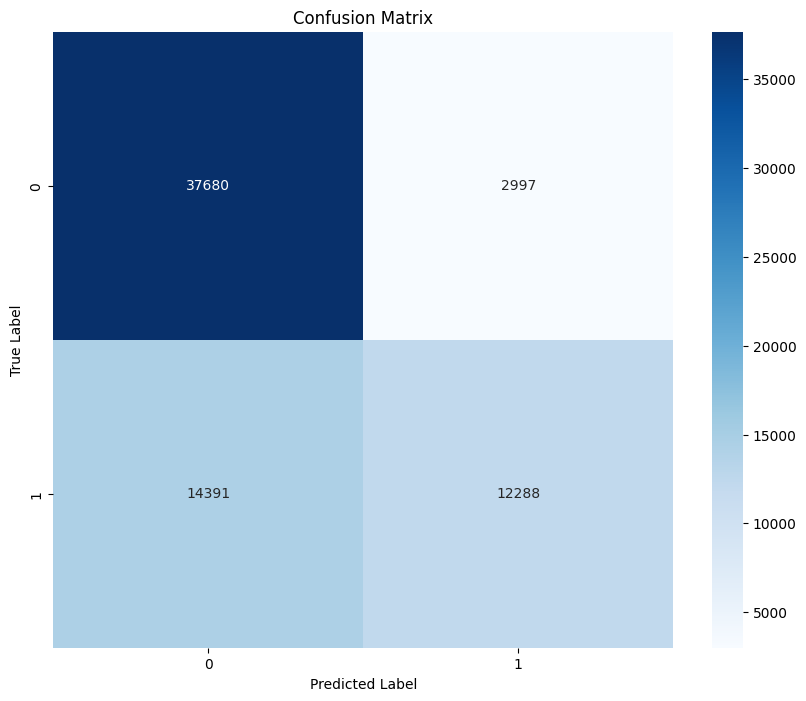

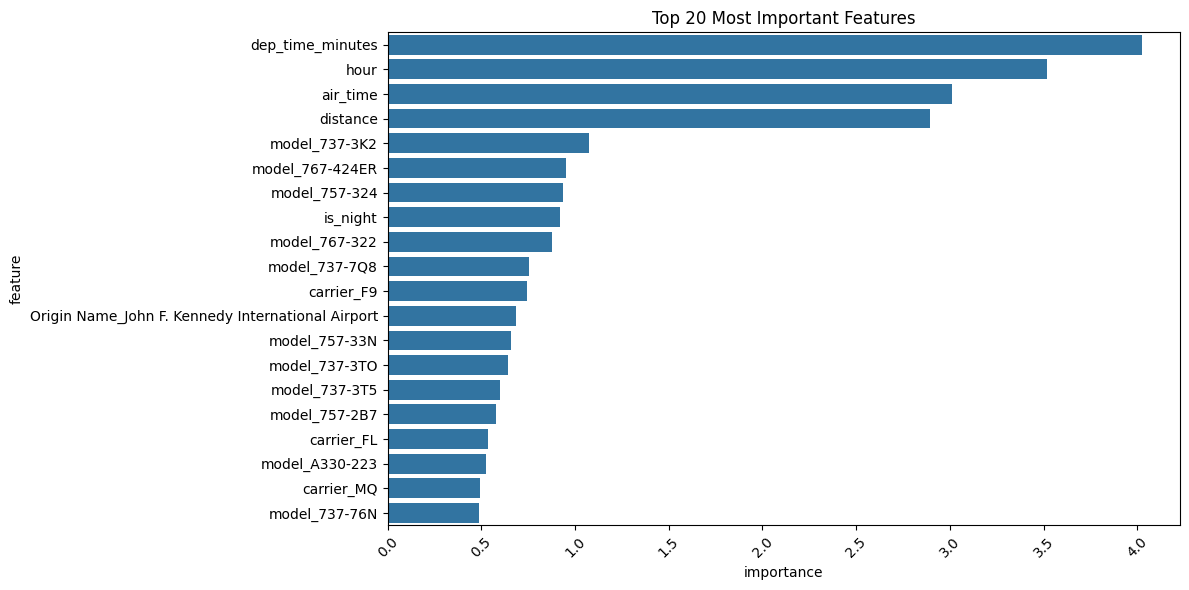

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Print additional metrics
print("\nAdditional Metrics:")
print(f"Number of features used: {X_train.shape[1]}")
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': np.abs(lr_model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Most Important Features')
plt.xticks(rotation=45)
plt.tight_layout()


Here's a breakdown of the key metrics:

- **Accuracy**: 74% - This is the overall percentage of correct predictions.
- **Precision**:
  - Class 0 (Not Delayed): 72% - Of the flights predicted as not delayed, 82% were actually not delayed.
  - Class 1 (Delayed): 80% - Of the flights predicted as delayed, 80% were actually delayed.
- **Recall**:
  - Class 0 (Not Delayed): 93% - 93% of the actual not delayed flights were correctly predicted.
  - Class 1 (Delayed): 46% - 46% of the actual delayed flights were correctly predicted.
- **F1-Score**:
  - Class 0 (Not Delayed): 83%
  - Class 1 (Delayed): 74%

Considering our problem statement, it is more important for us to know accurately if a flight is going to be delayed or not. Hence, in our case Recall or also known as Sensitivity is an important metric.

Considering our metrics,

We have a good precision of 80%, however the Recall value is quite less at 46%. The F1 - Score for Class 1 is 74% which provides a balance between Precision and Recall.

## Making Better Predictions:

In predictive modeling for flight delays, using a simple binary threshold (e.g., 0.5) limits the model to two outcomes: delayed or not delayed. However, in real-world scenarios, delays are often uncertain and may vary significantly. Therefore, we’re using probability-based categories to better communicate the likelihood of delays. Here’s why each step was taken:

1.	Probability Thresholding: Instead of relying on a 0.5 threshold, this approach uses multiple thresholds (25%, 50%, 75%) to provide a finer-grained interpretation of delay risks. Each threshold corresponds to a specific level of confidence in the likelihood of delay:

  * **Not likely to be delayed:** A low probability of delay (≤ 25%), where delays are unlikely.

  * **Somewhat not likely to be delayed:** A moderate level of uncertainty, with delays possible but not probable.

  * **Somewhat likely to be delayed:** A higher probability where delays are more likely.

  * **Most likely to be delayed:** A very high probability (over 75%) where delays are almost certain.

2.	User-Interpretability: By categorizing predictions into interpretable levels, stakeholders like airline staff or passengers can better understand the delay risk and make informed decisions, such as adjusting schedules or preparing contingency plans for high-risk flights.

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Create logistic regression with adjusted parameters
lr_model = LogisticRegression(
    random_state=42,
    max_iter=500,
    tol=1e-4,
    solver='sag',
    n_jobs=-1
)

# Fit the model
print("Training model...")
lr_model.fit(X_train, y_train)

# Check if model converged
if lr_model.n_iter_ < 1000:
    print(f"Model converged in {lr_model.n_iter_} iterations")
else:
    print("Model hit iteration limit - may not have fully converged")

# Get the predicted probabilities of delay (Class 1)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# Define thresholds and categorize predictions based on probability ranges
def categorize_delay(probability):
    if probability <= 0.25:
        return "Not likely to be delayed"
    elif probability <= 0.50:
        return "Somewhat not likely to be delayed"
    elif probability <= 0.75:
        return "Somewhat likely to be delayed"
    else:
        return "Most likely to be delayed"

# Apply the function to get the final categories
delay_predictions = np.array([categorize_delay(prob) for prob in y_pred_proba])

Training model...
Model converged in [135] iterations


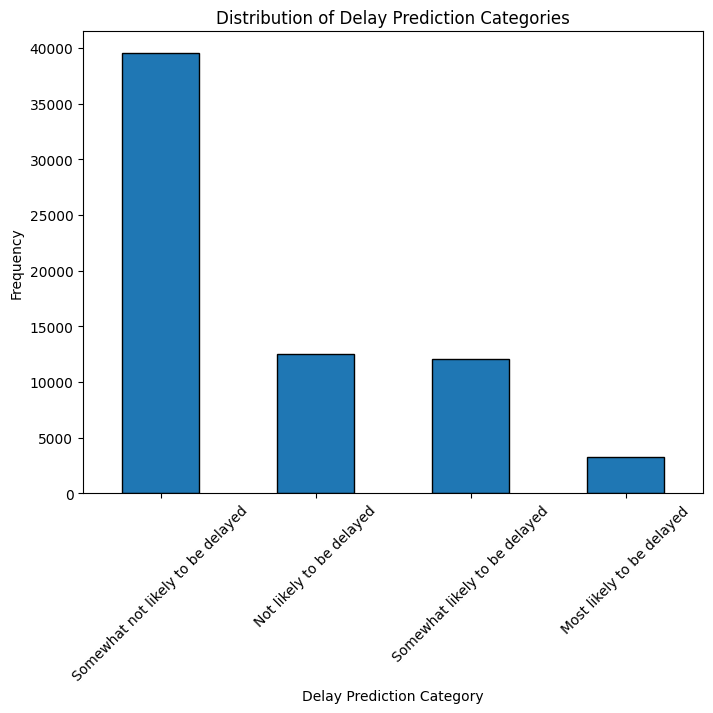

In [72]:
# Count the occurrences of each category
delay_distribution = pd.Series(delay_predictions).value_counts()

# Plot the distribution of delay prediction categories
plt.figure(figsize=(8, 6))
delay_distribution.plot(kind='bar', edgecolor='black')
plt.title("Distribution of Delay Prediction Categories")
plt.xlabel("Delay Prediction Category")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

From this visualization, we can see that our model has predicted that most flights are `Somewhat not likely to be delayed`. It means their probability of delay is between 26% to 49%.  